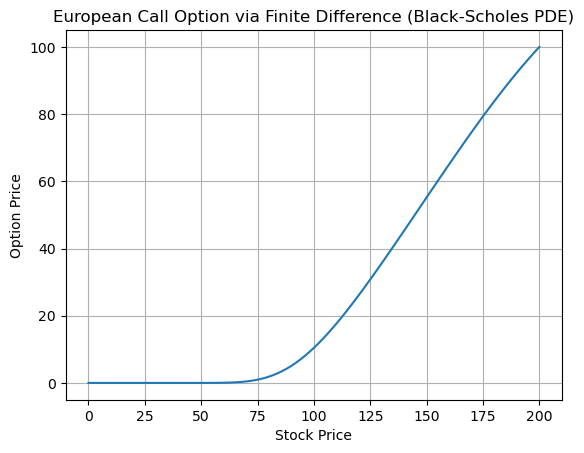

In [8]:
import numpy as np
import matplotlib.pyplot as plt

S=200
K=100
sigma=0.2
r=0.05
T=1

#now we'll have to discretize time or simulate the paths
#means breaking the total time in smaller steps,such as daily or monthly intervals
#means generating possible future paths of stock price based on the model(black scholes model) and these time steps

N = 1000 #no of time steps
dt = T/N #time step size
M=100
S_grid = np.linspace(0, S, M+1)


ds = S/M

#Boundry condition: at expiry = max(S-K,0)
V= np.maximum(S_grid-K,0)

for n in range (N):
    V_new = V.copy()
    for i in range (1,M):
        delta = (V[i+1]- V[i-1])/(2*ds)
        gamma = (V[i+1]-2*V[i]+V[i-1])/(ds**2)
        V_new[i] = V[i] +dt * (0.5 * sigma**2 * S_grid[i]**2 * gamma + r * S_grid[i] * delta - r * V[i])
    V_new[0] = 0
    V_new[M] = S_grid[M] - K * np.exp(-r * (T - (n+1)*dt))
    V = V_new

plt.plot(S_grid, V)
plt.xlabel("Stock Price")
plt.ylabel("Option Price")
plt.title("European Call Option via Finite Difference (Black-Scholes PDE)")
plt.grid(True)
plt.show()
